In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [4]:
df=pd.read_csv('College_Data')

In [5]:
df.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [10]:
 df=pd.get_dummies(data=df,columns=['Private'],drop_first=True)

In [11]:
df.head()

Unnamed: 0  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Private_Yes  
0        78       18.1           12    7041         60            1  
1        30       12.2           16   10527         56            1  
2        66       12.9           30    8735         54            1  
3        97        7.7           37   19016         59            1  
4        72       11.9            2   10922         15            1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
 18  Private_Yes  777 non-null    uint8  
dtypes: float

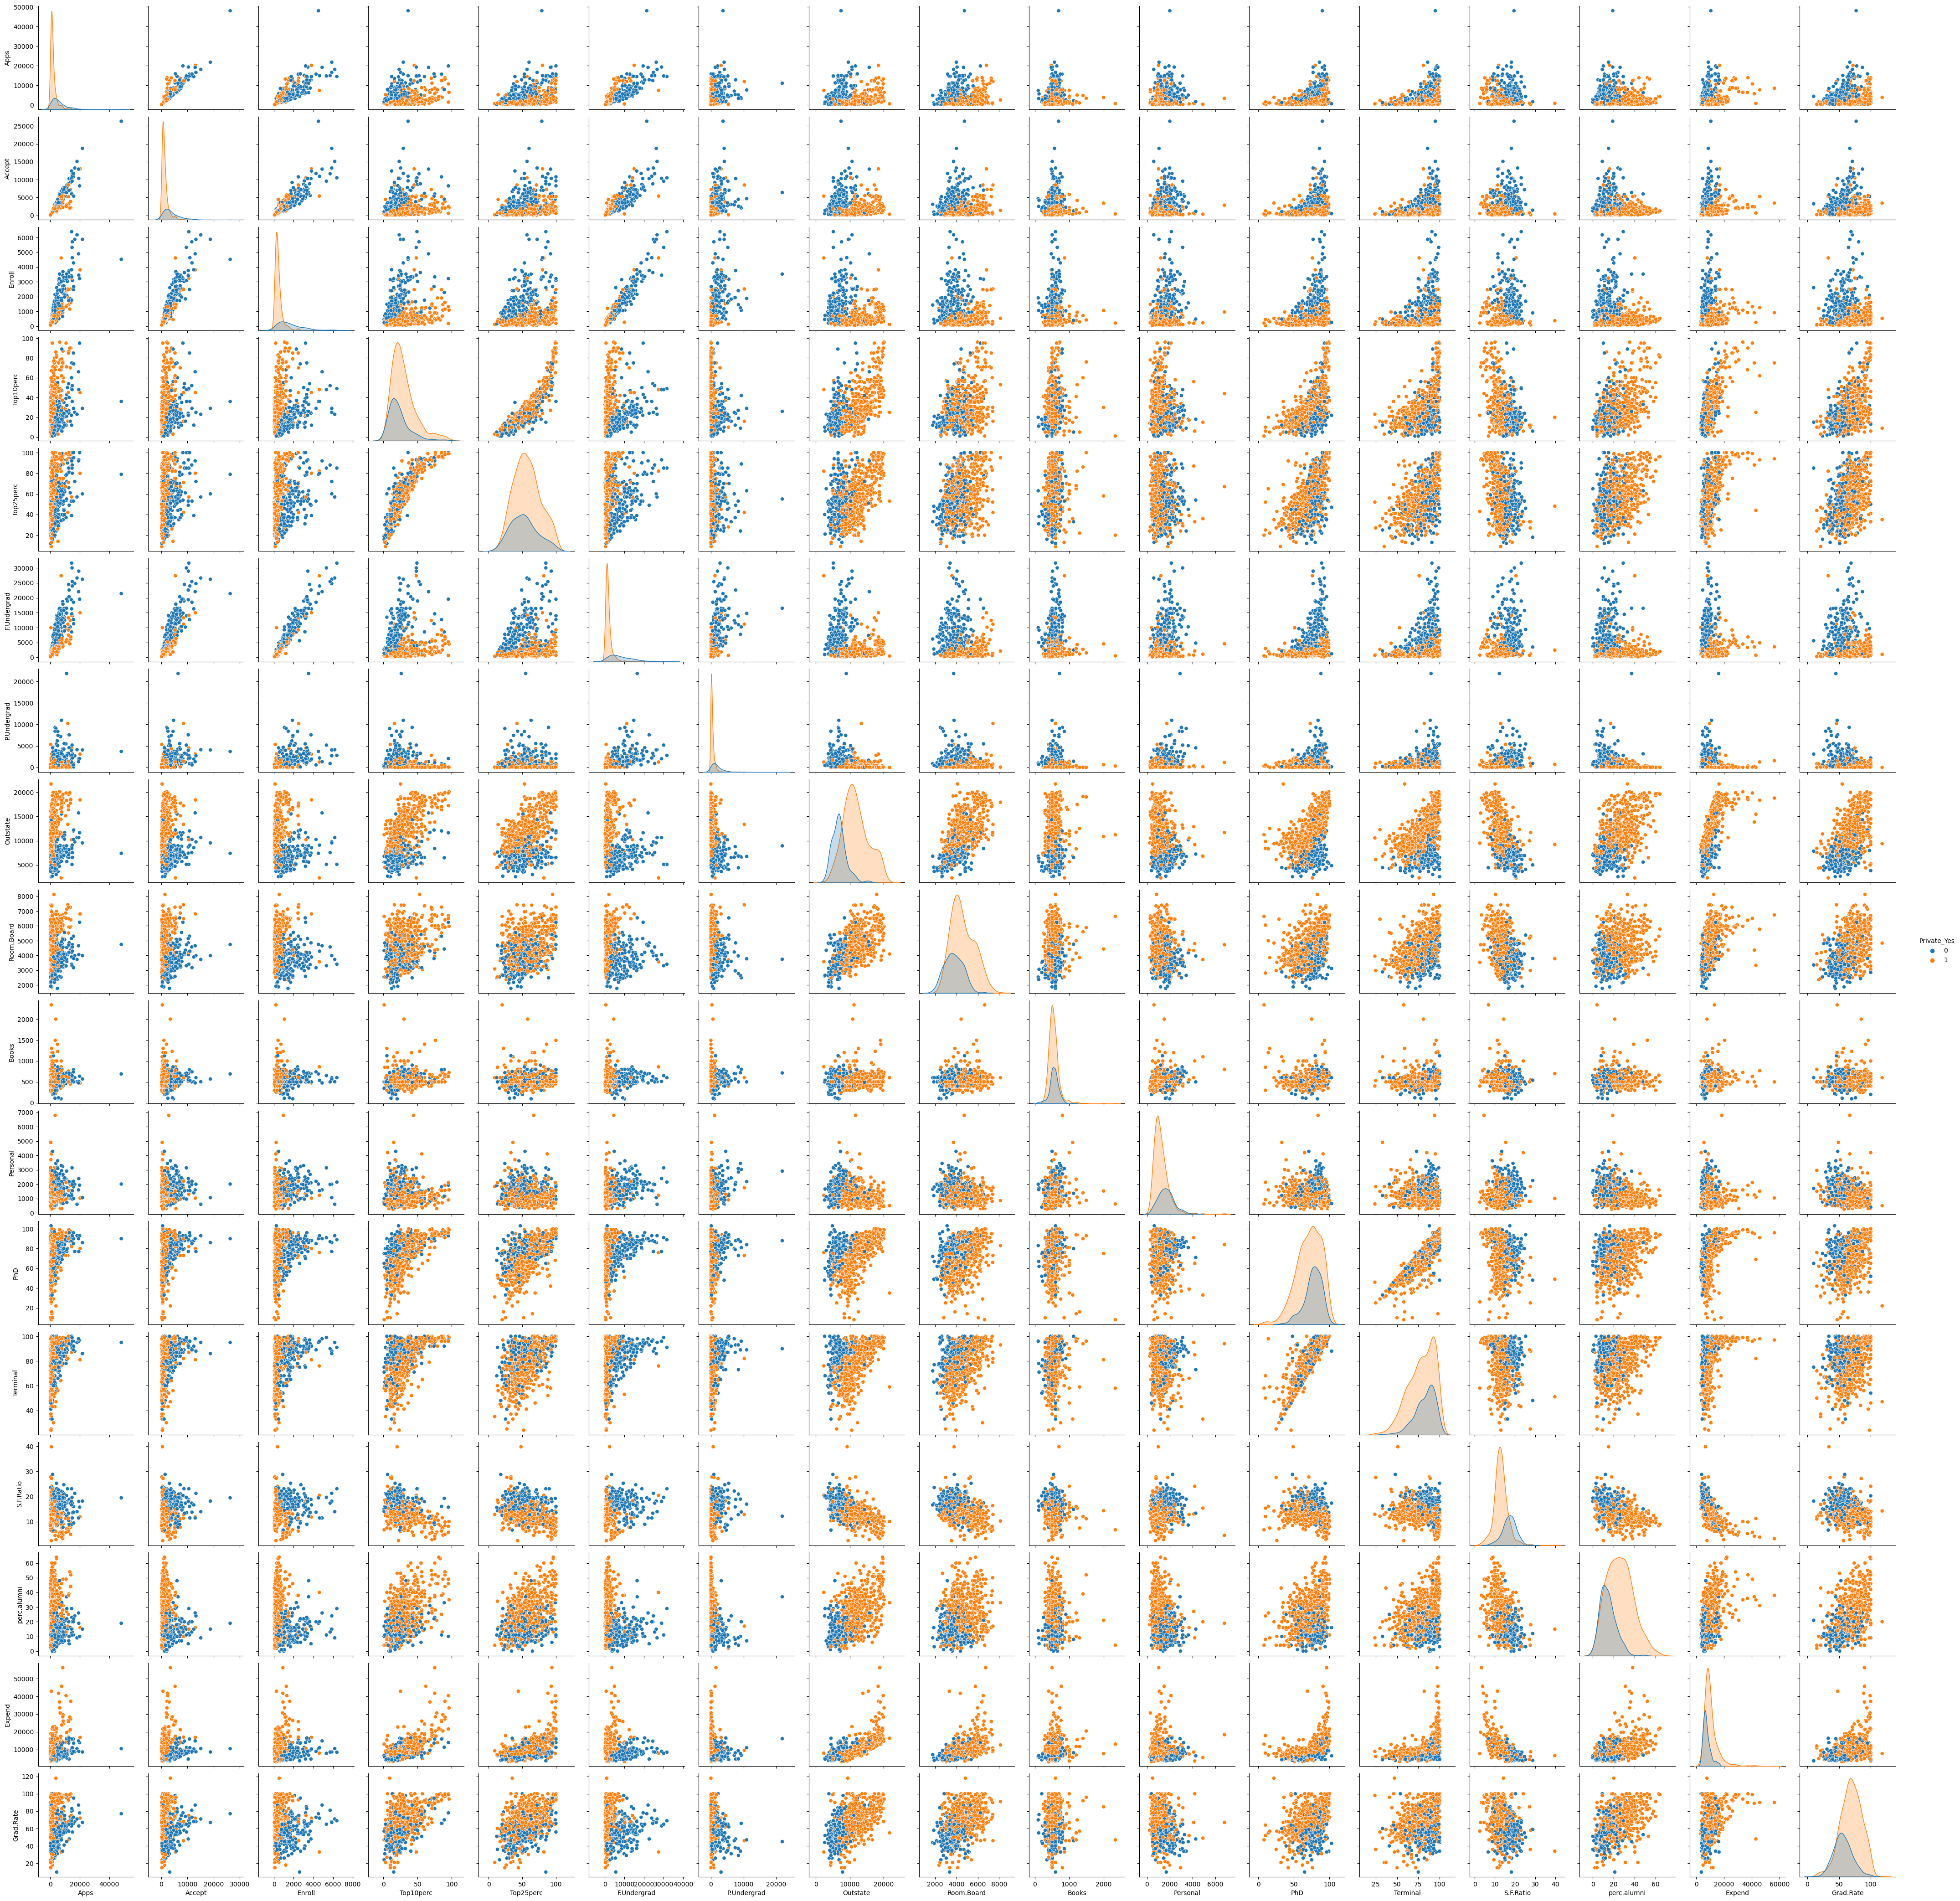

In [14]:
sns.pairplot(df,hue='Private_Yes')

<AxesSubplot:>

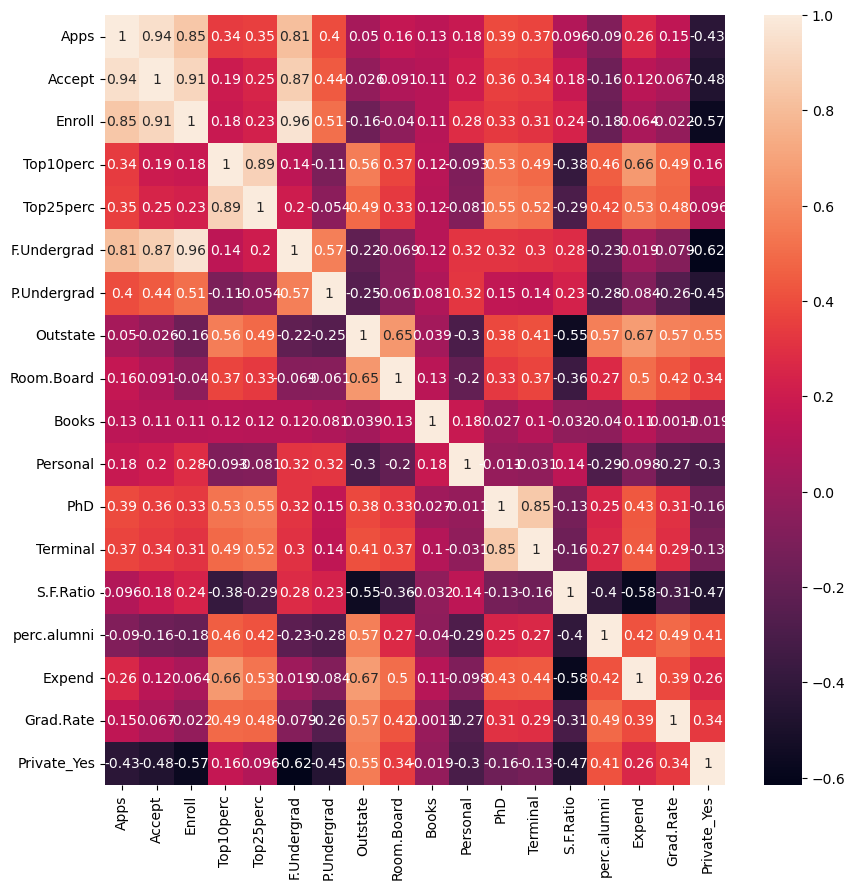

In [17]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Enroll', ylabel='Accept'>

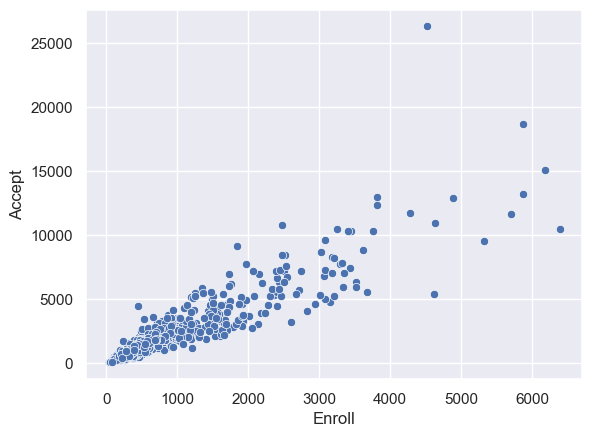

In [23]:
sns.set_theme(style='darkgrid')

sns.scatterplot(data=df,x='Enroll',y='Accept')

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmean= KMeans(n_clusters=2)

In [26]:
kmean.fit(df.drop(['Private_Yes','Unnamed: 0'],axis=1))

KMeans(n_clusters=2)

In [28]:
df['Priv_kmeans']= kmean.labels_

In [29]:
df.head()

Unnamed: 0  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Private_Yes  \
0        78       18.1           12    7041         60            1   
1        30       12.2           16   10527         56            1   
2        66       12.9           30    8735         54            1   
3        97        7.7           37   19016         59            1   
4        72       11.9            2   10922         15            1   

   Priv_kmeans  
0            0  
1            0  
2            0  
3            0  
4            0

In [30]:
kmean.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [31]:
from sklearn.metrics import classification_report ,confusion_matrix

print(classification_report(df['Private_Yes'],df['Priv_kmeans']))
print(confusion_matrix(df['Private_Yes'],df['Priv_kmeans']))

In [47]:
kmean.inertia_

48356202264.492134

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

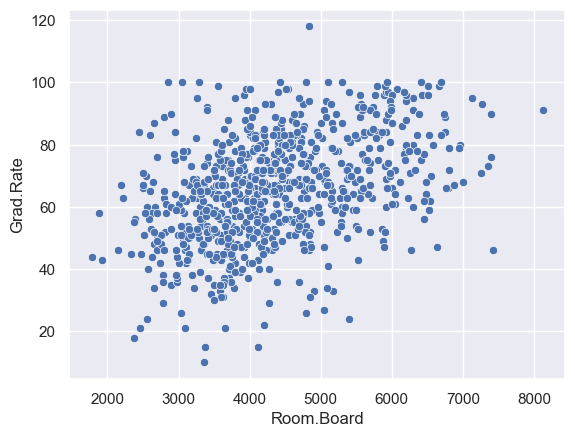

In [35]:
sns.scatterplot(data=df,x='Room.Board',y='Grad.Rate',palette='Priv_kmeans')

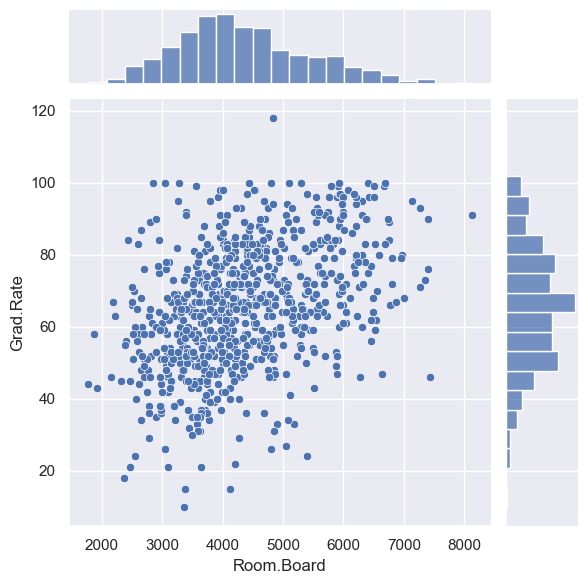

In [38]:
sns.jointplot(data=df,x='Room.Board',y='Grad.Rate')

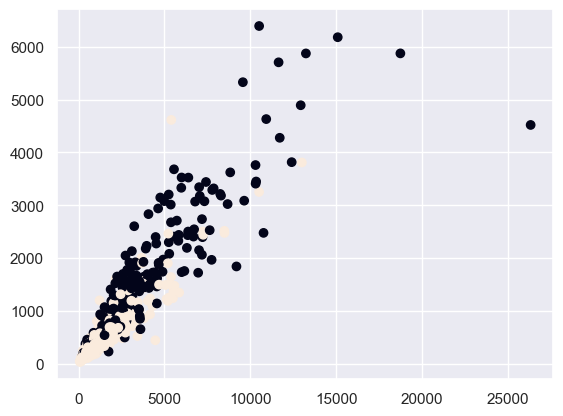

In [39]:
plt.scatter(x=df['Accept'],y=df['Enroll'],c=df['Private_Yes'])

(0.0, 6000.0)

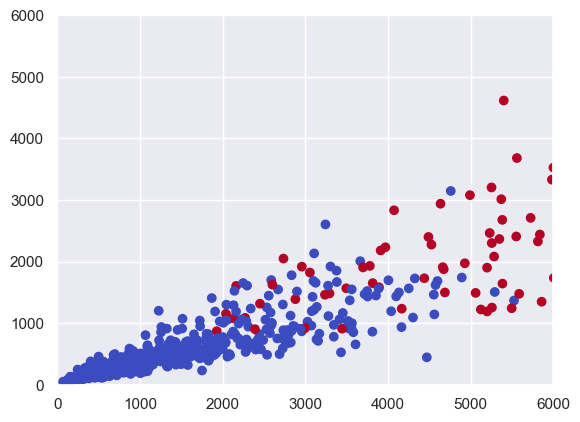

In [46]:
plt.scatter(x=df['Accept'],y=df['Enroll'],c=df['Priv_kmeans'],cmap='coolwarm')
plt.xlim(0,6000)
plt.ylim(0,6000)

In [62]:
def best_k(data,k_max):
    mean=[]
    inertions=[]
    for k in range(1,k_max):
        kmeam = KMeans(n_clusters=k)
        kmeam.fit(data)
        mean.append(k)
        inertions.append(kmeam.inertia_)
        
    print(mean)
    print(inertions)
    
    sns.jointplot(x=mean,y=inertions)
    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[72040559613.94109, 48356202264.492134, 32365874599.916046, 25519276300.920975, 20748753332.07424, 17753151870.455746, 15716676671.055721, 14438015242.003912, 13155321243.110603, 12062454381.522736, 11310216399.954935, 10723202472.501049, 10277819575.067167, 9764669677.514383]


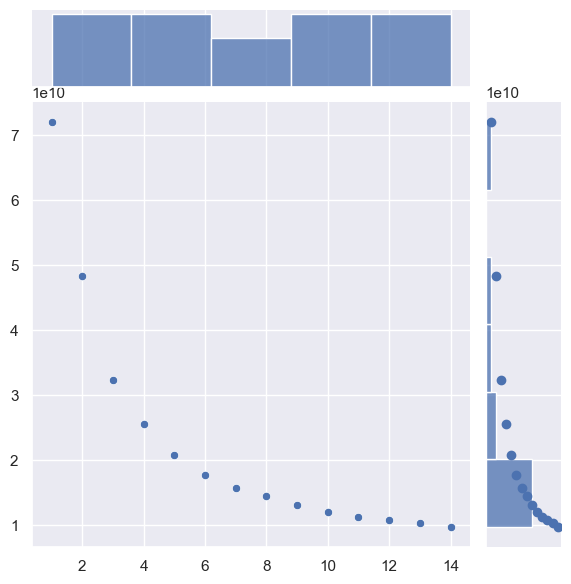

In [63]:
best_k(data=df.drop(['Private_Yes','Unnamed: 0','Priv_kmeans'],axis=1),k_max=15)

In [64]:
for k in range(4,8):
    kmean=KMeans(n_clusters=k)
    kmean.fit(df.drop(['Private_Yes','Unnamed: 0','Priv_kmeans'],axis=1))
    df[f'kmeans{k}']= kmean.labels_

In [66]:
df.head()

Unnamed: 0  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  ...  S.F.Ratio  \
0         2885          537      7440        3300  ...       18.1   
1         2683         1227     12280        6450  ...       12.2   
2         1036           99     11250        3750  ...       12.9   
3          510           63     12960        5450  ...        7.7   
4          249          869      7560        4120  ...       11.9   

   perc.alumni  Expend  Grad.Rate  Private_Yes  Priv_kmeans  kmeans4  kmeans5  \
0           12    7041         60            1            0        1        1   
1           16   10527         56            1            0        3        0   
2           30    8735         54            1            0        1        1   
3           37   19016         59            1            0        3        0   
4            2   10922         15            1            0        1        1   

   kmeans6  kmeans7  
0        1        0  
1        2        2  
2        2        2  
3        5        5  
4        1        0  

[5 rows x 24 columns]

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

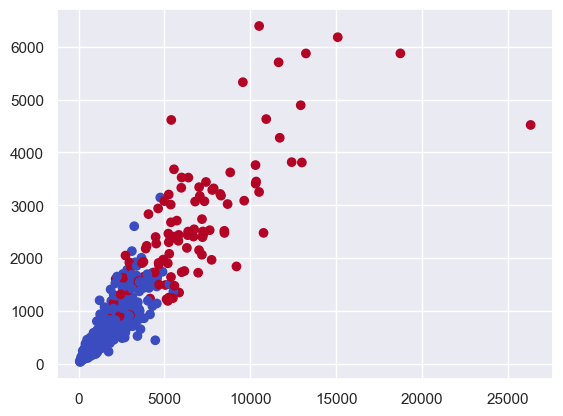

In [69]:
plt.scatter(x=df['Accept'],y=df['Enroll'],c=df['Priv_kmeans'],cmap='coolwarm')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
 18  Private_Yes  777 non-null    uint8  
 19  Priv_kme

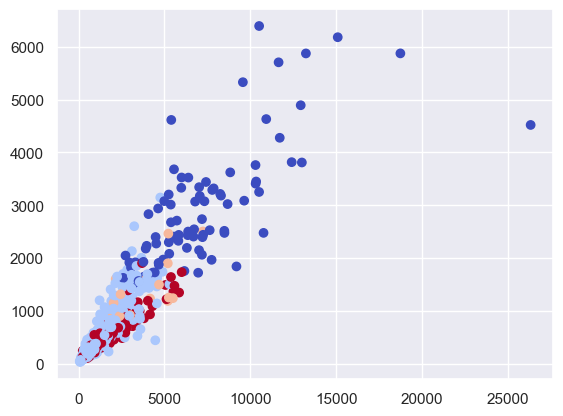

In [75]:
plt.scatter(x=df['Accept'],y=df['Enroll'],c=df['kmeans4'],cmap='coolwarm')


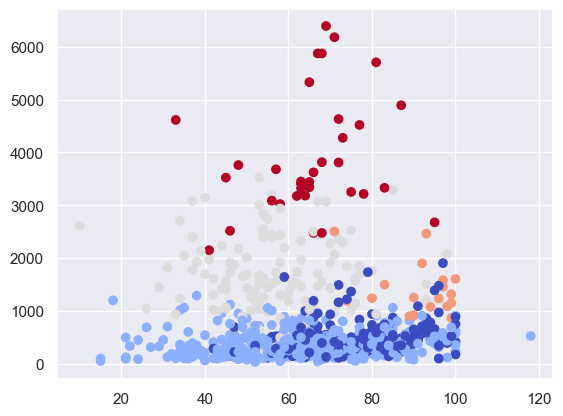

In [81]:
plt.scatter(x=df['Grad.Rate'],y=df['Enroll'],c=df['kmeans5'],cmap='coolwarm')


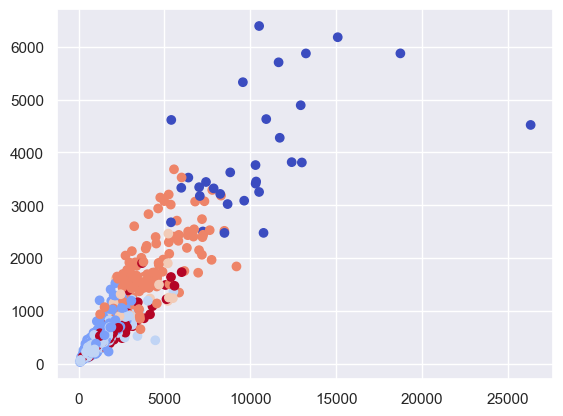

In [77]:
plt.scatter(x=df['Accept'],y=df['Enroll'],c=df['kmeans6'],cmap='coolwarm')


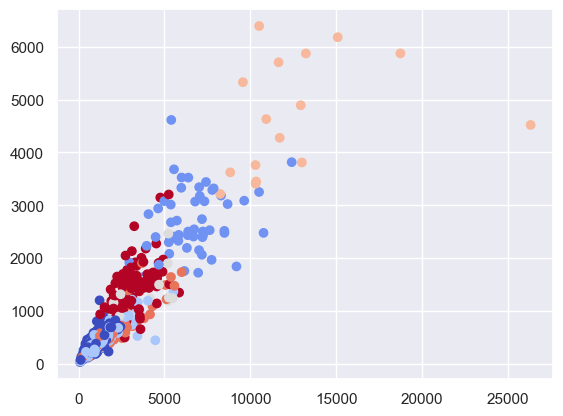

In [78]:
plt.scatter(x=df['Accept'],y=df['Enroll'],c=df['kmeans7'],cmap='coolwarm')